## Задача 1.

Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

#### Решение

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def get_field(iter):
    z = 0
    r = 0
    b = 0
    for i in range(0, iter):
        field = np.random.randint(0,37)
        if field == 0:
            z += 1
        elif field in [3, 12, 7, 18, 9, 14, 1, 16, 5, 23, 30, 36, 27, 34, 25, 21, 19, 32]:
            r += 1
        else:
            b += 1
    return [z,r,b]

iter = 1000
e = get_field(iter)
print(f"Произведено опытов -  {iter}")
print(f"0 выпало: {e[0]}")
print(f"Красное выпало: {e[1]}")
print(f"Черное выпало: {e[2]}")

Произведено опытов -  1000
0 выпало: 25
Красное выпало: 482
Черное выпало: 493


## Задача 2.

1) Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.

2) Сгенерируйте десять выборок случайных чисел х0, …, х9.
и постройте гистограмму распределения случайной суммы  +х0+ …+ х 9.


#### Решение

Пусть событие A выпадение красного поля, а событие B выпадение черного поля, тогда P(A)=18/37, P(B)=18/37, тогда вероятность выпадения красного или черного поля равна $P(A+B)=36/37$

Пусть событие A выпадение красного поля в первый раз, а событие B выпадение красного поля во второй раз. Эти события независимы и следовательно $$P(AB)=P(A)P(B)=\left({\frac{18}{37}}\right)^2$$

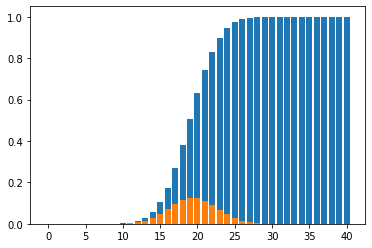

In [23]:
p = 18/37
q = (1 - p)
sumP = 0
arP = []
arSum = []
iter = 40
n = range(0, iter + 1)
for i in n:
    binom = np.math.factorial(iter)/(np.math.factorial(i)*np.math.factorial(iter-i))
    P = binom*(p**i)*(q**(iter-i))
    sumP = sumP+P
    arP.append(P)
    arSum.append(sumP)

plt.bar(n, arSum)
plt.bar(n, arP);

Text(0, 0.5, 'Вероятность')

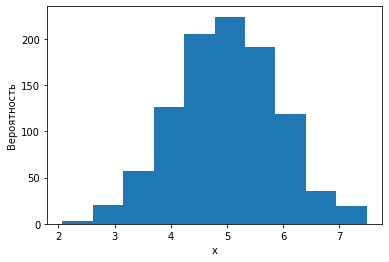

In [26]:
n = 1000
x0 = np.random.rand(n)
x1 = np.random.rand(n)
x2 = np.random.rand(n)
x3 = np.random.rand(n)
x4 = np.random.rand(n)
x5 = np.random.rand(n)
x6 = np.random.rand(n)
x7 = np.random.rand(n)
x8 = np.random.rand(n)
x9 = np.random.rand(n)
x = x0 + x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9
num_bins = 10
n, bins, patches = plt.hist(x, num_bins)

plt.xlabel('x')
plt.ylabel('Вероятность')


## Задача 3. 


1) Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) 
и сравните результаты.

2) Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.


#### Решение

In [28]:
def monte_carlo(N):
    p1 = 1/37 # выпадение зеро
    p2 = 18/37 # выпадение красного или черного поля
    q1 = (1 - p1)
    q2 = (1 - p2)
    j1 = j2 = j3 = 0
    for i in range(0, N):
        val = np.random.randint(0,37)
        if val == 0:
            print(f"В {i+1}-ом опыте выпало:")
            print("  Зеро")
            j1 = j1 + 1
            binom1 = np.math.factorial(N)/(np.math.factorial(j1)*np.math.factorial(N-j1))
            P1 = binom1*(p1**j1)*(q1**(N-j1))
            print(f"  Вероятность выпадения зеро {j1} из {N} раз: ", np.around(P1, decimals=5))
        elif val in [3, 12, 7, 18, 9, 14, 1, 16, 5, 23, 30, 36, 27, 34, 25, 
                   21, 19, 32]:
            print(f"В {i+1}-ом опыте выпало:")
            print("  красное поле ", val)
            j2 += 1
            binom2 = np.math.factorial(N)/(np.math.factorial(j2)*np.math.factorial(N-j2))
            P2 = binom2*(p2**j2)*(q2**(N-j2))
            print(f"  Вероятность выпадения красного поля {j2} из {N} раз: ", np.around(P2, decimals=5))
        else:
            print(f"В {i+1}-ом опыте выпало:")
            print("  черное поле ", val)
            j3 += 1
            binom3 = np.math.factorial(N)/(np.math.factorial(j3)*np.math.factorial(N-j3))
            P3 = binom3*(p2**j3)*(q2**(N-j3))
            print(f"  Вероятность выпадения черного поля {j3} из {N} раз: ", np.around(P3, decimals=5))


In [29]:
monte_carlo(5)

В 1-ом опыте выпало:
  черное поле  28
  Вероятность выпадения черного поля 1 из 5 раз:  0.16914
В 2-ом опыте выпало:
  красное поле  36
  Вероятность выпадения красного поля 1 из 5 раз:  0.16914
В 3-ом опыте выпало:
  Зеро
  Вероятность выпадения зеро 1 из 5 раз:  0.12111
В 4-ом опыте выпало:
  красное поле  32
  Вероятность выпадения красного поля 2 из 5 раз:  0.32048
В 5-ом опыте выпало:
  красное поле  7
  Вероятность выпадения красного поля 3 из 5 раз:  0.30361


In [30]:
monte_carlo(7)

В 1-ом опыте выпало:
  черное поле  22
  Вероятность выпадения черного поля 1 из 7 раз:  0.06244
В 2-ом опыте выпало:
  красное поле  30
  Вероятность выпадения красного поля 1 из 7 раз:  0.06244
В 3-ом опыте выпало:
  черное поле  29
  Вероятность выпадения черного поля 2 из 7 раз:  0.17747
В 4-ом опыте выпало:
  черное поле  28
  Вероятность выпадения черного поля 3 из 7 раз:  0.28021
В 5-ом опыте выпало:
  черное поле  33
  Вероятность выпадения черного поля 4 из 7 раз:  0.26546
В 6-ом опыте выпало:
  черное поле  22
  Вероятность выпадения черного поля 5 из 7 раз:  0.1509
В 7-ом опыте выпало:
  красное поле  32
  Вероятность выпадения красного поля 2 из 7 раз:  0.17747


## Задача 4.

(не обязательно, но желательно) Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k


#### Решение

In [32]:
import itertools
for p in itertools.permutations("123", 2):
    print(''.join(str(x) for x in p))

12
13
21
23
31
32


## Задача 5.

Дополните код расчетом коэффициента корреляции x и y по формуле 

$R=\frac{\sum{(x_i-x_m)(y_i-y_m)}}{\sqrt{\sum{(x_i-x_m)^2}\sum{(y_i-y_m)^2}}} $

#### Решение

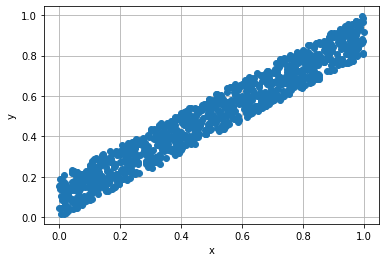

0.9713517852618808


In [33]:
n = 1000
r = 0.8
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()
xm = np.sum(x)/n
ym = np.sum(y)/n
x1 = x - xm
y1 = y - ym
Rxy = np.sum(x1 * y1)/np.sqrt(np.sum(x1 * x1) * np.sum(y1 * y1))
print(Rxy)